# Plotting time-lapse data prompt
Whenever the user asks you to load a file, show him elfinder by runnning the following code:
```
from imjoy import api
import imageio
from imjoy_rpc.utils import open_elfinder
import matplotlib.pyplot as plt

async def setup():
    fm = await api.createWindow(
        src="https://jupyter.imjoy.io/elFinder/index.html"
    )

api.export({"setup": setup})
```

Always use the following code example when downloading a file
```
from pyodide import http
import pandas as pd
import json
import io
_response = await http.pyfetch("https://gist.githubusercontent.com/oeway/75e0db98bbd039149ab8efe1fafb95fd/raw/hpa-umap-data-2d.json")
_data = await _response.bytes()
_file = io.BytesIO(_data)
_file.name = "hpa-umap-data-2d.json"
```
When making a pandas dataframe, replace all blanks in row names and column names with . Remove brackets from column or row names.


This is an example code to remove the last column from a data frame:
```
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
```
For plotting use plotlib. If all columns in a data frame are containing numbers, melt the data frame for plotting. If a column name is specified that does not exist in the data frame, search for the column that contains the specified name and use this column. If one column is specified as x, use it as x values in the plot and do not plot it as y values.

# Download https://raw.githubusercontent.com/oeway/codex-skills/main/sample-data/calcium-traces-timelapse-experiment.csv

In [29]:
from pyodide import http
import pandas as pd
import json
import io
_response = await http.pyfetch("https://raw.githubusercontent.com/oeway/codex-skills/main/sample-data/calcium-traces-timelapse-experiment.csv")
_data = await _response.bytes()
_file = io.BytesIO(_data)
_file.name = "calcium-traces-timelapse-experiment.csv"
df = pd.read_csv(_file)

# Show it

In [30]:
df

,time (min),bPAC,bPAC.1,bPAC.2,mNphp3(201)-bPAC,mNphp3(201)-bPAC.1,mNphp3(201)-bPAC.2,mCherry,mCherry.1,mCherry.2,Note: This dataset was retrieved from https://doi.org/10.6084/m9.figshare.11417325.v1. which is licensed under CC-BY-4.0. For more information please visit this link!
0,0.000000,0.002,-0.031,0.000,0.008,-0.004,-0.014,0.026,0.016,0.011,NaN
1,0.166667,-0.001,-0.034,0.000,0.007,-0.011,0.018,-0.013,0.007,-0.017,NaN
2,0.333333,0.002,-0.035,-0.003,0.004,-0.017,0.005,0.012,-0.014,0.021,NaN
3,0.500000,-0.002,-0.036,-0.001,-0.002,-0.016,0.002,0.035,0.006,0.019,NaN
4,0.666667,0.002,-0.033,-0.001,0.008,-0.014,-0.022,0.015,0.000,-0.014,NaN
...,...,...,...,...,...,...,...,...,...,...,...
419,72.216670,1.174,1.003,1.362,1.195,0.836,1.384,1.674,0.956,1.914,NaN
420,72.383330,1.178,1.000,1.378,1.198,0.832,1.375,1.668,0.949,1.950,NaN
421,72.550000,1.179,1.010,1.388,1.197,0.830,1.355,1.652,0.930,1.919,NaN
422,72.716670,1.180,1.007,1.377,1.199,0.827,1.367,1.593,0.941,1.922,NaN


# Remove columns that contain only NaN values

In [31]:
df.dropna(axis=1, how='all', inplace=True)

# Show

In [32]:
df

,time (min),bPAC,bPAC.1,bPAC.2,mNphp3(201)-bPAC,mNphp3(201)-bPAC.1,mNphp3(201)-bPAC.2,mCherry,mCherry.1,mCherry.2
0,0.000000,0.002,-0.031,0.000,0.008,-0.004,-0.014,0.026,0.016,0.011
1,0.166667,-0.001,-0.034,0.000,0.007,-0.011,0.018,-0.013,0.007,-0.017
2,0.333333,0.002,-0.035,-0.003,0.004,-0.017,0.005,0.012,-0.014,0.021
3,0.500000,-0.002,-0.036,-0.001,-0.002,-0.016,0.002,0.035,0.006,0.019
4,0.666667,0.002,-0.033,-0.001,0.008,-0.014,-0.022,0.015,0.000,-0.014
...,...,...,...,...,...,...,...,...,...,...
419,72.216670,1.174,1.003,1.362,1.195,0.836,1.384,1.674,0.956,1.914
420,72.383330,1.178,1.000,1.378,1.198,0.832,1.375,1.668,0.949,1.950
421,72.550000,1.179,1.010,1.388,1.197,0.830,1.355,1.652,0.930,1.919
422,72.716670,1.180,1.007,1.377,1.199,0.827,1.367,1.593,0.941,1.922


# Plot the dataframe. use time (min) as x values. use all other columns as y values. show each column separately.

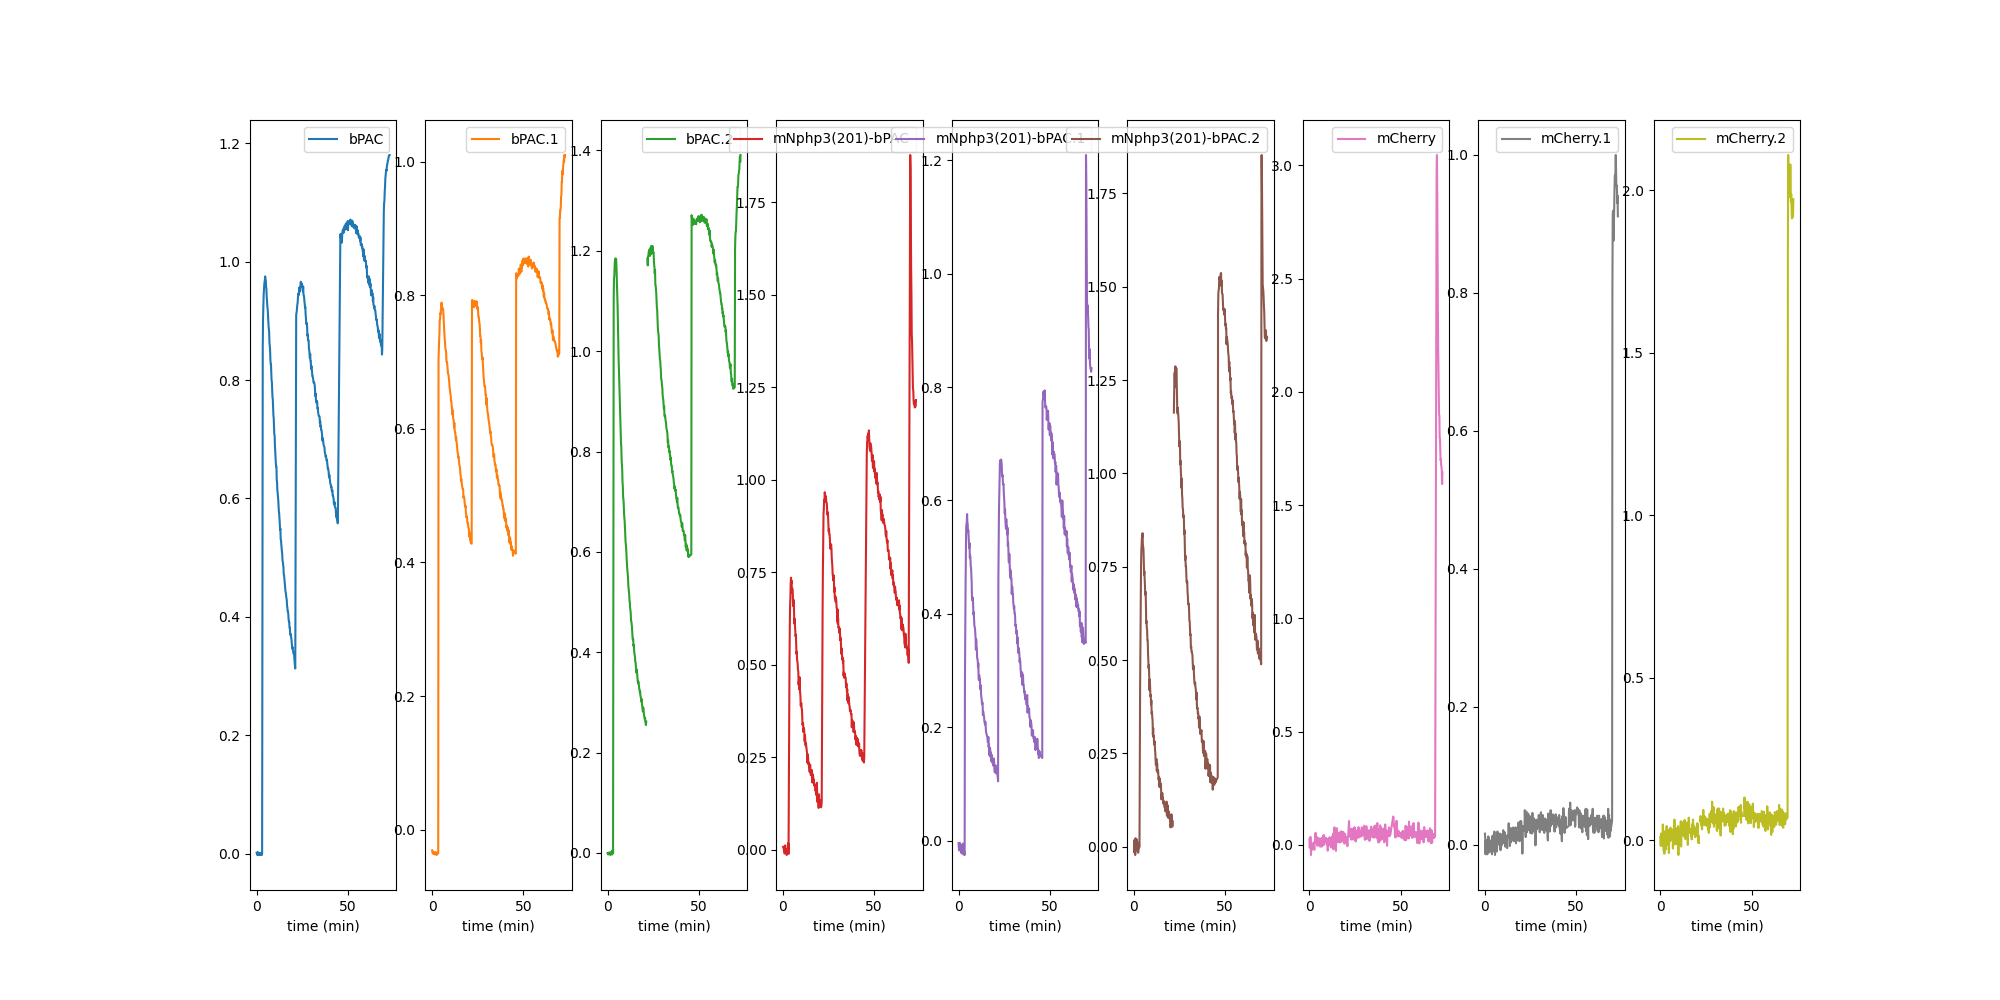

In [57]:
import matplotlib.pyplot as plt
df.plot(x="time (min)", subplots=True, layout=(1, len(df.columns)-1), figsize=(20, 10))
plt.show()

# Overlay all plots into one plot

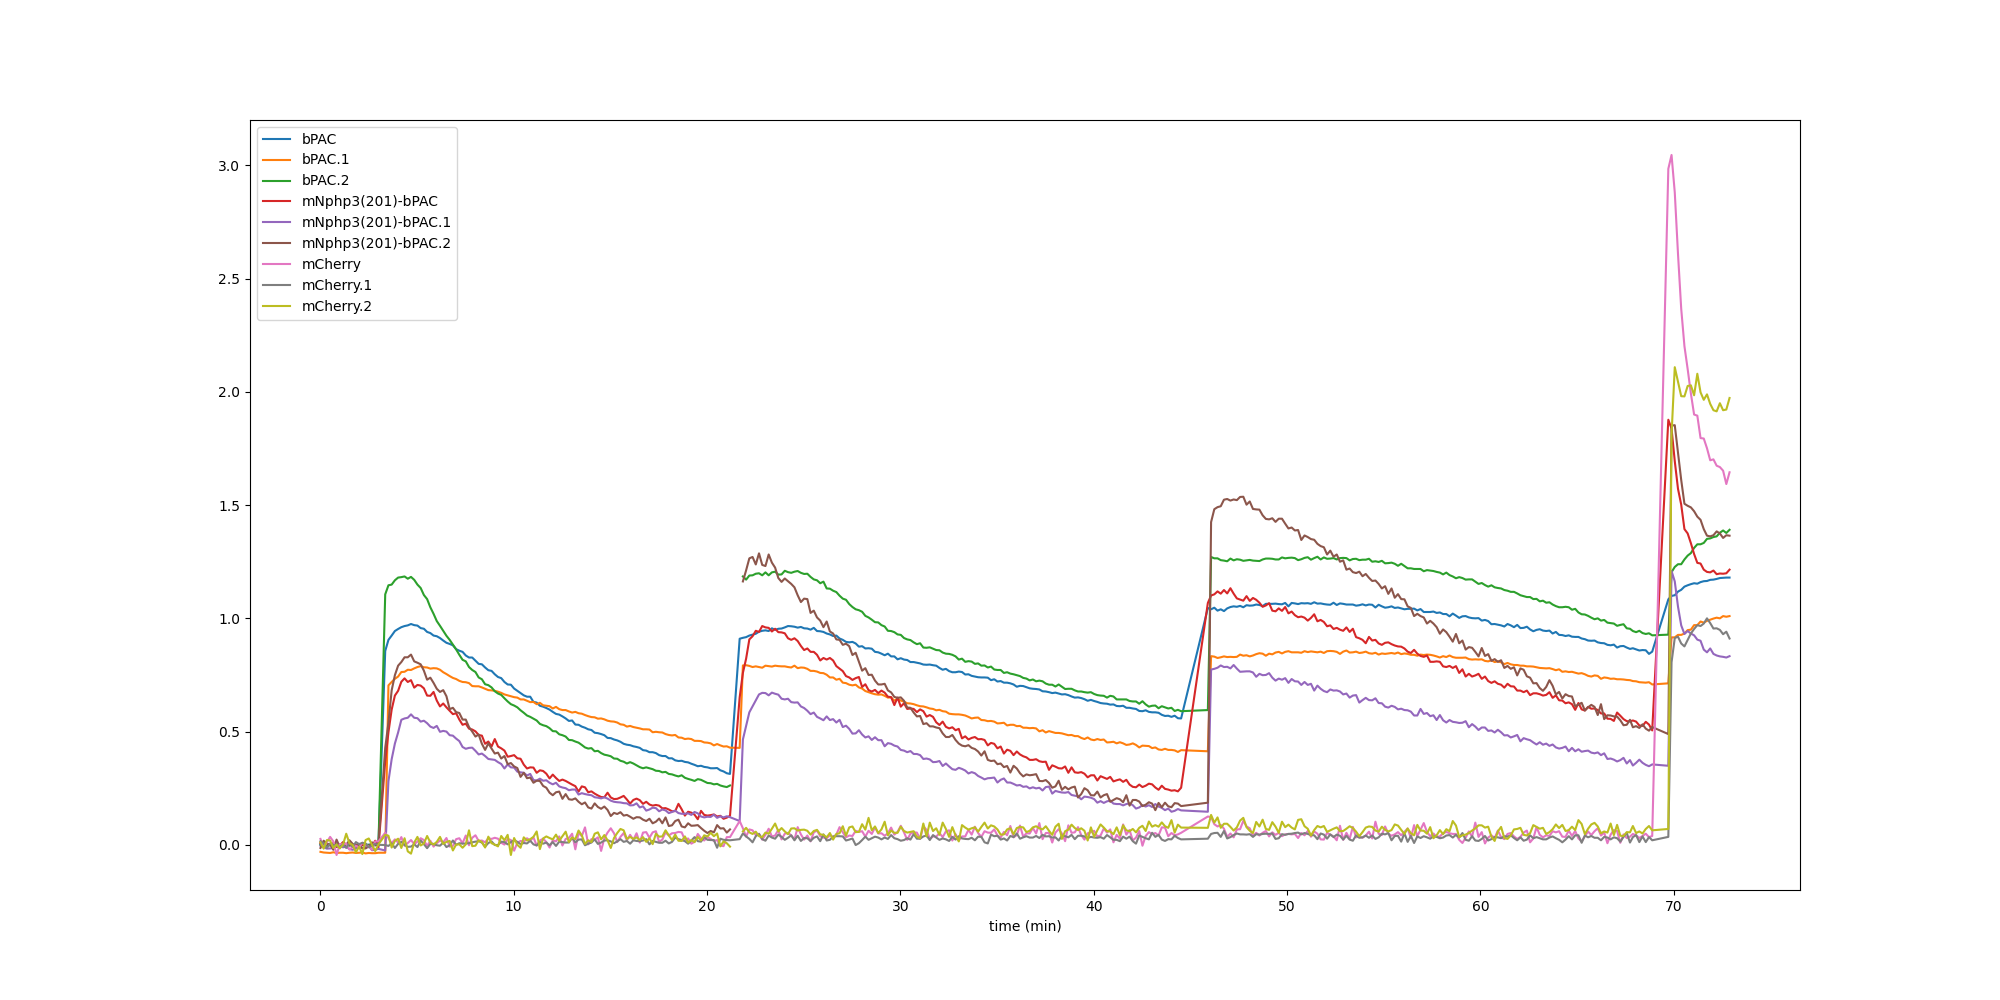

In [58]:
import matplotlib.pyplot as plt
df.plot(x="time (min)", subplots=False, layout=(1, len(df.columns)-1), figsize=(20, 10))
plt.show()